<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Access denied
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
  <script>
   (function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener("DOMContentLoaded",f
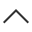

In [1]:
from bs4 import BeautifulSoup
import requests

HOME = "https://www.just-eat.co.uk/area/ec1v-london"
response = requests.get(HOME)

page = BeautifulSoup(response.content, 'html.parser')

print(page.prettify())